# Least-Squares by Linear Algebra

## Dependency

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from sklearn.linear_model import LinearRegression

## Lease-squares by left inverse

$$ X \beta = y $$

- $X$
  - Called **design matrix**
  - **Tall matrix** (Typically has more number of data than the number of features)
  - **Full column rank** meaning columns form the **linearly independent set**. If $X$ is $(m, n)$, the rank is $n$.
    - If it's not full column rank meaning $X$ is a **reduced rank** matrix, also meaning the columns in a matrix forms **linearly dependent set**, it's called **multicollineariy** in statistics.
  - $X$ itself is not invertible.
  - But tall matrix can have one-sided, **left inverse** if it has linearly independet set of columns.
  - We are given this data.
- $\beta$
  - A vector of coefficient parameters.
  - We are not given this data. We don't know.
- $y$
  - Dependent variable
  - A vector
  - We are given this data.

The goal is to remove $X$ from the left side of the equation, and to compute the numbers for $\beta$ by using $X$ and $y$.

If $X$ is a *square, full-rank* matrix, we can remove $X$ by left-multiplying inverse of $X$, $X^{-1}$, and making it identity matrix to disappear from the left side. But $X$ is not square, so we can't do it.

<center>We can't do this</center>
$$ X^{-1} X \beta = X^{-1} y $$
$$ I \beta = X^{-1} y $$
$$ \beta = X^{-1} y $$

Instead, we first try to make it square by left-multiply $X^T$, because suppose $X$ has $(m, n)$, $X^T X$ is $(n, m)$ times $(m, n)$, so $X^T X$ is $(n, n)$ square.

$$ X^T X \beta = X^T y$$

We wanna remove $X^T X$ so left-multiply the inverse of $X^T X$, $(X^T X)^{-1}$. We can do that because it's square.

$$ (X^T X)^{-1} X^T X \beta = (X^T X)^{-1} X^T y $$

Because $A^{-1} A = I$, and as if $A = X^T X$

$$ I \beta = (X^T X)^{-1} X^T y $$
$$ \beta = (X^T X)^{-1} X^T y $$

This equation has a weird looking, but we know why we have this, because we wanted to first **square** it, and take the **inverse**, and get **identity matrix** to leave the left side only $\beta$.

In linear algebra, $(X^T X)^{-1} X^T$ is called **left-inverse**. It appears when we have a tall matrix and we wanna get the inverse of it.

We got numbers of $\beta$, but $X \beta$ typically does not produce the number exactly same as $y$. When $X \beta$ produces exact $y$, it called **exact solution**. In linear algebra, it's the situation where $y$ belongs to the columns space of $X$. But in real-world problem that statistics solves, $y$ is unlikely to be in the column space, because statistics tries to develop a simplified equation to formulate the complex real-world problem.

<center>Exact solution is this, but it's unlikely to happen</center>
$$ y \in C(X) $$

Instead, we find $\hat{y}$ which is $\hat{y} \in C(X)$, and use it as

$$ \beta = (X^T X)^{-1} X^T \hat{y} $$
$$ \hat{y} \in C(X) $$
$$ y = X \beta + \varepsilon $$
$$ (y + \varepsilon) \in C(X)$$

## Apply the math to example

Given data
   car_price  years_used
0        330         1.0
1        290         1.5
2        210         2.0
3        250         2.0
4        130         3.0
5        105         3.0


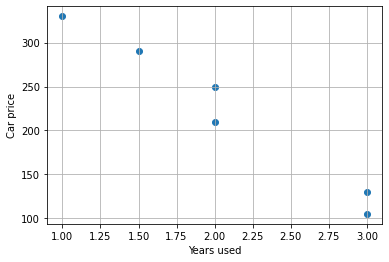

In [29]:
data = [
    { 'car_price': 330, 'years_used': 1 },
    { 'car_price': 290, 'years_used': 1.5 },
    { 'car_price': 210, 'years_used': 2 },
    { 'car_price': 250, 'years_used': 2 },
    { 'car_price': 130, 'years_used': 3 },
    { 'car_price': 105, 'years_used': 3 },
]

df = pd.DataFrame(data)

print('Given data')
print(df)

plt.scatter(df['years_used'], df['car_price'])
plt.xlabel('Years used')
plt.ylabel('Car price')
plt.grid()
plt.show()

X
[[1.  1. ]
 [1.  1.5]
 [1.  2. ]
 [1.  2. ]
 [1.  3. ]
 [1.  3. ]]

y
[[330]
 [290]
 [210]
 [250]
 [130]
 [105]]

beta
[[ 446.17]
 [-108.96]]

Predicted y
[[337.21]
 [282.73]
 [228.25]
 [228.25]
 [119.29]
 [119.29]]



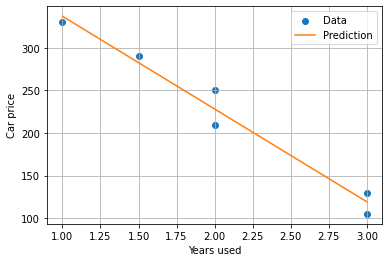

In [30]:
# Create a design matrix
df['intercept'] = 1
X = df[['intercept', 'years_used']].to_numpy()
y = df[['car_price']].to_numpy()

print('X')
print(X)
print()

print('y')
print(y)
print()

# Compute beta
beta = np.linalg.inv(X.T @ X) @ X.T @ y

print('beta')
print(np.round(beta, 2))
print()

# Predict y
y_pred = X @ beta

print('Predicted y')
print(np.round(y_pred, 2))
print()

# Visualize
xs = np.linspace(1, 3, 10)
ys = beta[0][0] + beta[1][0] * xs 
plt.scatter(df['years_used'], df['car_price'], color='tab:blue', label='Data')
plt.plot(xs, ys, color='tab:orange', label='Prediction')
plt.xlabel('Years used')
plt.ylabel('Car price')
plt.grid()
plt.legend()
plt.show()

## Get coefficients by Scikit-learn

In [31]:
model = LinearRegression()
model.fit(df[['years_used']].to_numpy(), df[['car_price']].to_numpy())

print(f'beta_0 from sklearn: {model.intercept_}')
print(f'beta_1 from sklearn: {model.coef_}')
print()
print('beta from math of left inverse')
print(beta)

beta_0 from sklearn: [446.16883117]
beta_1 from sklearn: [[-108.96103896]]

beta from math of left inverse
[[ 446.16883117]
 [-108.96103896]]


## Normal equation

$$ X \beta = y $$

Left-multiply the both sides of the equation by $X^T$

$$ X^T X \beta = X^T y $$

That is **normal equation**. It's used in the following **least-squares by RREF** and **least-squares by QR decomposition**.

## Least-squares by reduced row echelon form (RREF)

$$ X \beta = y $$

First, convert it to **normal equation**.

$$ X^T X \beta = X^T y $$

Apply **reduced row echelon form (RREF) to compute matrix inverse** to the given data. It's about making augmented matrix by concatenating matrix at the left and identity matrix at the right, apply RREF, and get augmented matrix of identity matrix at the left concatenated by **matrix inverse** at the right, as below

$$ RREF([A | I]) = [I | A^{-1}] $$

When we apply that to the augmented matrix concatenated by left and right side of **normal equation**, 

$$ RREF([X^T X | X^T y]) = [I | \beta]$$

In [32]:
m = 10
n = 3

X = np.random.randn(m, n)
y = np.random.randn(m, 1)

# Make components in normal equation
XtX = X.T @ X
Xty = X.T @ y

# Make augmented matrix for RREF
normEQ = Matrix(np.concatenate([XtX, Xty], axis=1))

# Apply RREF
Xsol = normEQ.rref()
Xsol = Xsol[0]
I, beta1 = Xsol[:, 0:3], Xsol[:, -1]
print('After applying RREF')
Xsol

After applying RREF


Matrix([
[1, 0, 0,  0.178065929548368],
[0, 1, 0, -0.254627854093396],
[0, 0, 1, -0.599894738135172]])

In [33]:
print('beta by RREF')
print(np.array(beta1))
print()

beta2 = np.linalg.solve(X.T @ X, X.T @ y)
print('beta from left-inverse')
print(beta2)
print()

beta by RREF
[[0.178065929548368]
 [-0.254627854093396]
 [-0.599894738135172]]

beta from left-inverse
[[ 0.17806593]
 [-0.25462785]
 [-0.59989474]]



## Least-squares by QR decomposition

$$ X \beta = y $$

The key part is, before applying **QR decomposition** to $X$, convert the equation to **normal equation** by left-multiplying by $X^T$

$$ X^T X \beta = X^T y $$

Replace $X$ with $Q R$ as QR decomposition. $Q$ is orthogonal matrix. $R$ is residual matrix.

$$ (Q R)^T Q R \beta = (Q R)^T y $$

Apply **LIVE EVIL rule** to apply transpose to inner matrices.

$$ R^T Q^T Q R \beta = (Q R)^T y $$

$Q^T Q$ gives us identity matrix $I$, because they are orthogonal matrices.

$$ R^T I R \beta = (Q R)^T y $$
$$ R^T R \beta = (Q R)^T y $$

Left-multiply both sides of the equation by $(R^T R)^{-1}$

$$ (R^T R)^{-1} R^T R \beta = (R^T R)^{-1} (Q R)^T y $$

Because, letting $R^T R = A$, $A^{-1} A = I$

$$ I \beta = (R^T R)^{-1} (Q R)^T y $$
$$ \beta = (R^T R)^{-1} (Q R)^T y $$

In [34]:
m = 10
n = 3

X = np.random.randn(m, n)
y = np.random.randn(m, 1)

print('X')
print(X.shape)
print(X)
print()
print('y')
print(y.shape)
print(y)
print()

# QR decomposition
Q, R = np.linalg.qr(X)
print('Q')
print(Q.shape)
print(Q)
print()
print('R')
print(R.shape)
print(R)
print()

# Compute beta by equation derived by QR decomposition
beta1 = np.linalg.solve(R.T @ R, (Q @ R).T @ y)
print('beta from QR decomposition')
print(beta1)
print()

# Verify computation with beta from left-inverse
# Beta = (X^T X)^{-1} X^T y
beta2 = np.linalg.solve(X.T @ X, X.T @ y)
print('beta from left-inverse')
print(beta2)
print()

X
(10, 3)
[[ 1.56004335 -0.13331395  0.90572831]
 [-0.67650934 -1.38440452  0.05094464]
 [-0.29596751 -0.63363259  0.16937364]
 [ 1.6884753   0.14048036 -0.39332567]
 [ 0.15248577 -0.93820778 -0.22392895]
 [-0.58886307  0.37316003  1.25761659]
 [-0.80602179 -1.02462465  0.28682909]
 [-0.99541072  0.7291451  -0.24081645]
 [ 0.06878947  1.03821045  0.75453856]
 [ 0.56475893 -0.03420051 -0.08094141]]

y
(10, 1)
[[ 1.27109839]
 [ 1.17781028]
 [-0.47839459]
 [ 0.74710893]
 [-0.2855962 ]
 [ 0.535066  ]
 [ 1.14912673]
 [-0.3275098 ]
 [ 0.13796082]
 [-1.15406713]]

Q
(10, 3)
[[-0.5459854  -0.1287525  -0.52919334]
 [ 0.23676536 -0.53657542 -0.10323083]
 [ 0.10358298 -0.24623513 -0.12806536]
 [-0.59093413 -0.02237944  0.20289558]
 [-0.05336711 -0.39261321  0.06447652]
 [ 0.20609084  0.18120976 -0.66363098]
 [ 0.28209224 -0.38264851 -0.20981408]
 [ 0.34837475  0.34671755  0.19075146]
 [-0.024075    0.42319561 -0.35430989]
 [-0.19765485 -0.04083453  0.03497983]]

R
(3, 3)
[[-2.85729866 -0.32992339